<font color='red' size='5'> **Outlier Detection and Removal Using IQR** </font>>>

In [1]:
import pandas as pd
df = pd.read_excel('DS1.xls', engine='xlrd')
print (df)

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
       X     Y
0   1000  1050
1   1125  1150
2   1087  1213
3   1070  1275
4   1100  1300
5   1150  1300
6   1250  1400
7   1150  1400
8   1100  1250
9   1350  1830
10  1275  1350
11  1375  1450
12  1175  1300
13  1200  1300
14  1175  1275
15  1300  1375
16  1260  1285
17  1330  1400
18  1325  1400
19  1200  1285
20  1225  1275
21  1090  1135
22  1075  1250
23  1080  1275
24  1080  1150
25  1180  1250
26  1225  1275
27  1175  1225
28  1250  1280
29  1250  1300
30   750  1250
31  1125  1175
32   700  1300
33   900  1250
34   900  1300
35   850  1200


In [2]:
df.Y.skew()

2.2128589029601087

In [3]:
df.X.skew()

-1.0421372999845977

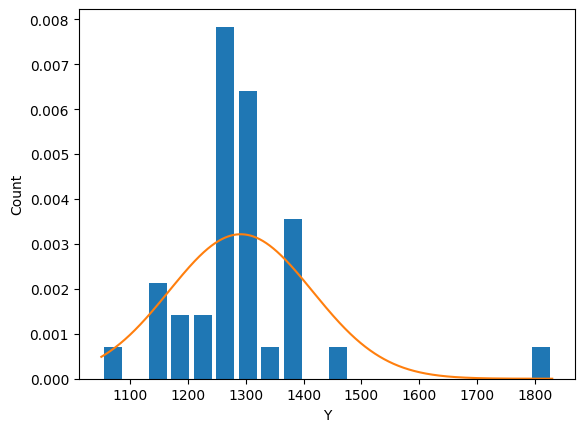

In [4]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
plt.hist(df.Y, bins=20, rwidth=0.8, density=True)
plt.xlabel('Y')
plt.ylabel('Count')

rng = np.arange(df.Y.min(), df.Y.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Y.mean(),df.Y.std()))

In [5]:
df.shape

(36, 2)

In [6]:
df.describe()

,X,Y
count,36.000000,36.000000
mean,1134.777778,1291.055556
std,158.583211,124.058038
min,700.000000,1050.000000
25%,1080.000000,1250.000000
50%,1162.500000,1277.500000
75%,1250.000000,1300.000000
max,1375.000000,1830.000000



<font color='red' size='5'>Detect outliers using IQR</font>

In [7]:
Q1 = df.Y.quantile(0.25)
Q3 = df.Y.quantile(0.75)
Q1, Q3

(1250.0, 1300.0)

In [8]:
IQR = Q3 - Q1
IQR

50.0

In [9]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(1175.0, 1375.0)


<font color='red' size='5'>Here are the outliers</font>

In [10]:
df[(df.Y<lower_limit)|(df.Y>upper_limit)]

,X,Y
0,1000,1050
1,1125,1150
6,1250,1400
7,1150,1400
9,1350,1830
11,1375,1450
17,1330,1400
18,1325,1400
21,1090,1135
24,1080,1150



<font color='red' size='6'>Remove the outliers and produce new dataframe</font>

In [11]:
df_no_outlier = df[(df.Y>lower_limit)&(df.Y<upper_limit)]
df_no_outlier

,X,Y
2,1087,1213
3,1070,1275
4,1100,1300
5,1150,1300
8,1100,1250
10,1275,1350
12,1175,1300
13,1200,1300
14,1175,1275
16,1260,1285


In [12]:
df_no_outlier.shape

(24, 2)

In [13]:
df.shape

(36, 2)

In [14]:
df_no_outlier

,X,Y
2,1087,1213
3,1070,1275
4,1100,1300
5,1150,1300
8,1100,1250
10,1275,1350
12,1175,1300
13,1200,1300
14,1175,1275
16,1260,1285


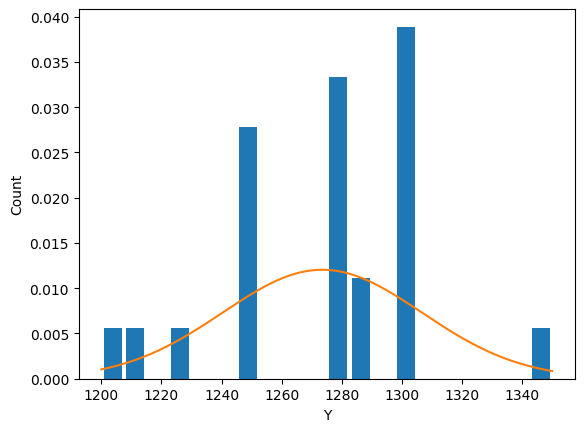

In [15]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
plt.hist(df_no_outlier.Y, bins=20, rwidth=0.8, density=True)
plt.xlabel('Y')
plt.ylabel('Count')

rng = np.arange(df_no_outlier.Y.min(), df_no_outlier.Y.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df_no_outlier.Y.mean(),df_no_outlier.Y.std()))

In [16]:
# collecting x & y
X = df_no_outlier['X'].values
Y = df_no_outlier['Y'].values

# calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(Y)
mean_x,mean_y

(1098.0, 1273.4583333333333)

Regression Equation: Y = 0.06X + 1202.79
R-squared: 0.10


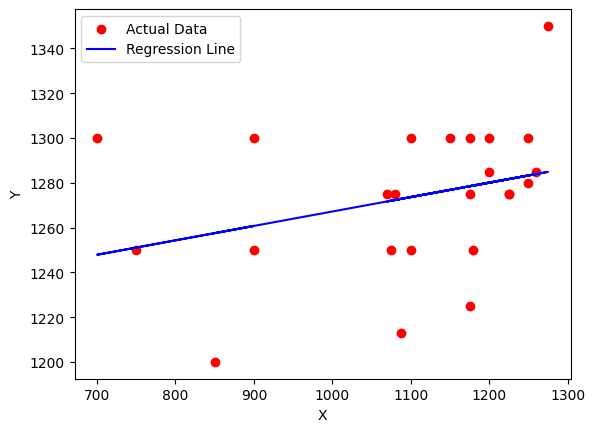

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your data into X and Y

# Calculate the means of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Calculate the slope (m) and intercept (c) using the least squares method
numer = 0
denom = 0
for i in range(len(X)):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

m = numer / denom
c = mean_y - (m * mean_x)

# Create a regression line using the calculated m and c
regression_line = [(m * x) + c for x in X]

# Calculate the coefficient of determination (R-squared)
ssr = 0  # Sum of squared residuals
sst = 0  # Total sum of squares
for i in range(len(X)):
    y_pred = (m * X[i]) + c
    ssr += (Y[i] - y_pred) ** 2
    sst += (Y[i] - mean_y) ** 2

r_squared = 1 - (ssr / sst)

# Plot the data points and regression line
plt.scatter(X, Y, c="red", label="Actual Data")
plt.plot(X, regression_line, label="Regression Line", color="blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Display the regression equation and R-squared value
print(f"Regression Equation: Y = {m:.2f}X + {c:.2f}")
print(f"R-squared: {r_squared:.2f}")

plt.show()


Regression Equation (Training): Y = 0.07X + 1199.74
R-squared (Training): 0.16
Mean Squared Error (Test): 1646.52
R-squared (Test): -0.51


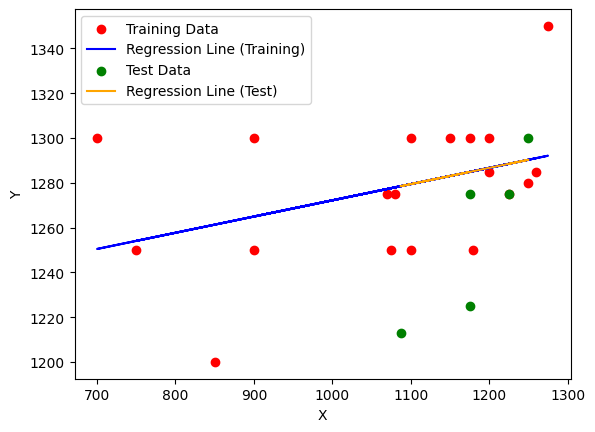

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have loaded your data into X and Y

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate the means of X_train and Y_train
mean_x = np.mean(X_train)
mean_y = np.mean(Y_train)

# Calculate the slope (m) and intercept (c) using the least squares method
numer = 0
denom = 0
for i in range(len(X_train)):
    numer += (X_train[i] - mean_x) * (Y_train[i] - mean_y)
    denom += (X_train[i] - mean_x) ** 2

m = numer / denom
c = mean_y - (m * mean_x)

# Create a regression line using the calculated m and c for training set
regression_line_train = [(m * x) + c for x in X_train]

# Calculate the coefficient of determination (R-squared) for training set
ssr = sum((Y_train - regression_line_train) ** 2)
sst = sum((Y_train - mean_y) ** 2)
r_squared_train = 1 - (ssr / sst)

# Make predictions on the test set
regression_line_test = [(m * x) + c for x in X_test]

# Calculate MSE and R-squared for the test set
mse = mean_squared_error(Y_test, regression_line_test)
r_squared_test = r2_score(Y_test, regression_line_test)

# Plot the data points and regression line for training set
plt.scatter(X_train, Y_train, c="red", label="Training Data")
plt.plot(X_train, regression_line_train, label="Regression Line (Training)", color="blue")

# Plot the data points and regression line for test set
plt.scatter(X_test, Y_test, c="green", label="Test Data")
plt.plot(X_test, regression_line_test, label="Regression Line (Test)", color="orange")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Display the regression equation and R-squared value for training set
print(f"Regression Equation (Training): Y = {m:.2f}X + {c:.2f}")
print(f"R-squared (Training): {r_squared_train:.2f}")

# Display the MSE and R-squared value for test set
print(f"Mean Squared Error (Test): {mse:.2f}")
print(f"R-squared (Test): {r_squared_test:.2f}")

plt.show()
